# Working With Arrays
Python is an easy language to work with, but it can be a bit slow, overall its recomended to use inbuilt functions of Python instead of remaking them.

## Lists
Lets look on some of the functions that work with list type specifically.

In [6]:
a = ['a', 'b', 'c'] # lets make a list
print("original list: ", a) # printing list
a[0] = 'A' # reassigning
print("list with reasignment: ", a)  # printing list with reasigned value

a.append('d') # you can append into a list
print("list with appended value: ",a)

popped = a.pop() # you can also remove last value from the list
print("value that was popped: ", popped)
print("popped last element from list: ", a)

popped = a.pop(0)  # you can state where to pop from
print("value that was popped: ", popped)
print("popped first element from list: ", a)

a.insert(0, 'a') # you can insert a value into a given index
print("list with inserted value: ", a)

a.reverse() # you can reverse a list via the following
print("reversed list: ", a)

val = 'b'
idx = a.index(val) # you can ask on which index is a value
print(f"{val} is located on index {idx}")

val = 'a'
a.append(val)
c = a.count(val) # you can count how many times an item is in list
print(f"there are {c}*{val} in {a}")

original list:  ['a', 'b', 'c']
list with reasignment:  ['A', 'b', 'c']
list with appended value:  ['A', 'b', 'c', 'd']
value that was popped:  d
popped last element from list:  ['A', 'b', 'c']
value that was popped:  A
popped first element from list:  ['b', 'c']
list with inserted value:  ['a', 'b', 'c']
reversed list:  ['c', 'b', 'a']
b is located on index 1
there are 2*a in ['c', 'b', 'a', 'a']


Some of the above functions can be easily be implemented in python, but is it a wise thing to do? Lets time them!

Play a bit with the two values list_length and val, how does these two aproaches change with the different list lengths and the location of the value to search for?



In [52]:
import time


list_length = 200
val = 199
numbers = [i for i in range(list_length)]


# python implementation
start = time.time()
idx = numbers.index(val)
print(f"{val} is located on index {idx}")
print("the time it took: ", time.time() - start)

# own implementation
start = time.time()
for idx, n in enumerate(numbers):
    if n is val:
        print(f"{val} is located on index {idx}")
        break

print("the time it took: ", time.time() - start)


199 is located on index 199
the time it took:  0.0002086162567138672
199 is located on index 199
the time it took:  6.890296936035156e-05


Well this isn't very scientific, what could be scientific would be a benchmark! So lets write one!

We will wrap both of the search algorithms into a function and we will time them. Wait, but we already did that no? Yes but now we will time them every time it takes them to search the array for a value, that moves more and more into a back of an array that is getting longer and longer

In [59]:

def my_search(val: int, numbers: list) -> int:
    for idx, n in enumerate(numbers):
        if n is val: # if n is val:
            return idx
    return -1

def python_search(val: int, numbers: list) -> int:
    return numbers.index(val)

def benchmark_search(numbers: list, func, step, max_length) -> list:
    results = []
    for l in range(0, max_length, step):
        start = time.time()
        func(l, numbers)
        results.append(time.time() - start)
        if l % 100 == 0:
            print(f"run number {l}")
    return results



step = 1
max_length = 1000
numbers = [i for i in range(max_length)]

print("******* my search *******")
my_results = benchmark_search(numbers, my_search, step, max_length)
print("\n\n")

print("******* python search *******")
python_results = benchmark_search(numbers, python_search, step, max_length)
print("\n\n")



******* my search *******
run number 0
run number 100
run number 200
run number 300
run number 400
run number 500
run number 600
run number 700
run number 800
run number 900



******* python search *******
run number 0
run number 100
run number 200
run number 300
run number 400
run number 500
run number 600
run number 700
run number 800
run number 900





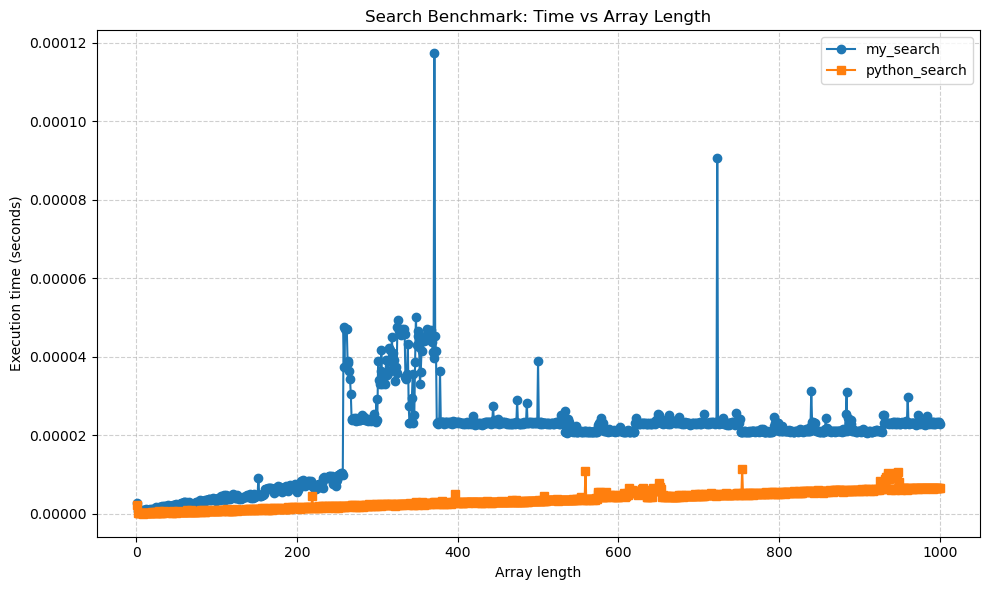

In [60]:
import matplotlib.pyplot as plt
import numpy as np

# X values (array lengths)
lengths = np.arange(1, max_length + 1, step)

# Plot both results
plt.figure(figsize=(10, 6))
plt.plot(lengths, my_results, label="my_search", marker='o')
plt.plot(lengths, python_results, label="python_search", marker='s')
plt.title("Search Benchmark: Time vs Array Length")
plt.xlabel("Array length")
plt.ylabel("Execution time (seconds)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

Now these are interesting results, at the stat we can see that these two algorithms follow each other closely bat later they diverge, python implementation taking the lead in how fast it is!

Bonus for some point: try replacing the if n == val in my_search() function with if n is val. Rerun the benchmark and plot the results. What just happened?

## Strings

We already introduced strings with lists in previous lectures, now lets go over some simple string functions.
Lets start with some we already know from lists!

In [2]:
word = "hello world!"
print(word)

# strings have some functions a list has as well, we don't need to introduce these two
print(f"this is the letter on index 0: {word[0]}")
idx = word.index(" ")
print(f"space is located on index {idx}")
count = word.count("l")
print(f"l in {count} times in the word: {word}")

this is the letter on index 0: h
space is located on index 5
l in 3 times in the word: hello world!


Unlike lists, strings do not support assignment!

In [3]:
word[0] = "b" # this will not work

TypeError: 'str' object does not support item assignment

Strings have many more functions! Try these functions and see for yourself what each does!

In [19]:
print(word.capitalize()) # will make only the first word with capital letter others with lower case
print(word.title()) # makes every word in the string with capital letter
print(word.find("world")) # will find a substring in the string and returns its index
print(word.replace("world", "class")) # will replace given substring with another
print(word.split(" ")) # will split the string using the given string to do so
print(" ".join(["hey", "how", "are", "you?"])) # will join the strings with the given string

Hello world!
Hello World!
6
hello class!
['hello', 'world!']
hey how are you?


## Tuples
Let us reintroduce tuples and run over them!

once again, tupple has many similar functions to other array like structures in python

In [ ]:
tup = (0,1,2,3, "a", 2)
print(tup)
print(tup[0])
print(tup.count(2))
print(tup.index("a"))

However, similar to string tuples don't support reassignment

In [20]:
tup[3] = "b"

NameError: name 'tup' is not defined

## Dictionaries
This structure isn't like any other array, it doesn't really have indexes, but it stores informations with labels.

Let us make an example. We have a class of students, Daniel, Rose and Rick and perhaps we want to store their age.

In [22]:
dic = {"Daniel": 16, "Rose": 17, "Rick": 17}
print(dic)

{'Daniel': 16, 'Rose': 17, 'Rick': 17}


To ask for a specific student, we can simply do the following:

In [26]:
student = "Daniel"
print(f"student {student} is {dic[student]} years old")

student Daniel is 16 years old


If perhaps a student has a birthday we can simply reasign the value

In [28]:
print("before birthday: ", dic)
birthday_student = "Rose"
dic[birthday_student] += 1
print("after birthday: ", dic)

before birthday:  {'Daniel': 16, 'Rose': 18, 'Rick': 17}
after birthday:  {'Daniel': 16, 'Rose': 19, 'Rick': 17}


If we get a new student we can add him in a very particular way

In [29]:
print("before new student: ", dic)
dic[birthday_student] -= 1
new_student = "Mark"
dic[new_student] = 16
print("after new student: ", dic)

before new student:  {'Daniel': 16, 'Rose': 19, 'Rick': 17}
after new student:  {'Daniel': 16, 'Rose': 18, 'Rick': 17, 'Mark': 16}


As any other structures you can save anything under the id, lists, strings, dictionaries, list of dictionaries.

In [31]:
convoluted_dic = {"a": [{12: [0,1,2], "wth": "idk"}], 0: (0,1,2)}
print("convoluted dic: ", convoluted_dic)

convoluted dic:  {'a': [{12: [0, 1, 2], 'wth': 'idk'}], 0: (0, 1, 2)}


Now as you can save almost anything, another question rises, what can we use as ID? Well almost anything, specifically things that cannot change

In [32]:
int_num = int(2)
float_num = float(12.5)
string = "hello"
tup = (0,2,3)

dic = {int_num: 0, float_num: 1, string: 2, tup: 3}
print(dic)


{2: 0, 12.5: 1, 'hello': 2, (0, 2, 3): 3}


However using list as ID wont work

In [33]:
arr = [0,1,2]
dic[arr] = 4

TypeError: unhashable type: 'list'

Lets now go over some of the functions dictionaries have

In [51]:
some_dic = {"a": 0, "b": 1, "c": 2}

print("the ids, or keys of the dictionary are: ", some_dic.keys())
print("the items and their ids of the dictionary are: ", some_dic.items())
print("the values in the dictionary are: ",some_dic.values())

# the pop function is back!
pop_key = "a"
popped = some_dic.pop(pop_key)
print(f"form {pop_key} we popped: {popped}")
print(f"dictionary now misses the key and value of {pop_key}: ",some_dic)

# we have also pop item that will pop the "last" item
popped = some_dic.popitem()
print("popped value with popitem(): ", popped)
print("dic without the popped item: ", some_dic)

some_dic.clear() # this will delete all in the dictionary
print("after calling clear() the dictionary is empty: ", some_dic) # now empty dictionary

the ids, or keys of the dictionary are:  dict_keys(['a', 'b', 'c'])
the items and their ids of the dictionary are:  dict_items([('a', 0), ('b', 1), ('c', 2)])
the values in the dictionary are:  dict_values([0, 1, 2])
form a we popped: 0
dictionary now misses the key and value of a:  {'b': 1, 'c': 2}
popped value with popitem():  ('c', 2)
dic without the popped item:  {'b': 1}
after calling clear() the dictionary is empty:  {}
